In [1]:
%load_ext autoreload
%autoreload 1
import os
import sys
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('../')) # or the path
sys.path.append(module_path)


import itertools
import pandas as pd
import numpy as np
%aimport mf

In [2]:
import torch

def random_projection(size,dist='normal', normalize=False, bias=False, scale=1, gate=False):
    
    # sample from a family of distribution
    if dist =='laplace':
        dist = torch.distributions.laplace.Laplace(0, 1)
    elif dist =='bernoulli':
        dist = torch.distributions.bernoulli.Bernoulli(0.5)
    else:
        dist = torch.distributions.normal.Normal(0,1)

    x = dist.sample(size)
    
    # normalize for unit-norm
    if bias or normalize:
        x = torch.nn.functional.normalize(x,dim=-1)

    # if bias (via quantile plans)    
    if bias:
        dist = torch.distributions.beta.Beta(1,1)
        b = dist.sample((size[1],))
        x = x + b

    if scale is not None:
        x = scale*x
    
    # quantize. tanh scale 
    if gate:
        x = torch.tanh(x)

    return x

x = random_projection((2,3),dist='laplace',normalize=True,bias=True,scale=5,gate=True)
print(x)

tensor([[-0.9897,  0.4577,  0.9732],
        [ 0.4232,  1.0000,  0.5603]])


[3746.910400390625, 2550.42724609375, 2408.958984375, 2666.712158203125, 2346.798828125, 2699.224609375, 1730.083984375, 2837.795654296875, 2297.058349609375, 2345.17529296875, 1905.024169921875, 2221.0087890625, 2200.466796875, 2178.457763671875, 1987.7506103515625, 2477.735107421875, 2579.41064453125, 2501.073974609375, 1922.340087890625, 2468.382568359375, 2309.412109375, 2555.7314453125, 2152.464111328125, 2584.5927734375, 1981.240966796875, 2753.77783203125, 2154.554443359375, 2350.25, 2467.447998046875, 2150.267822265625, 2609.44921875, 2230.26513671875, 2261.390625, 2615.26953125, 2011.5015869140625, 2769.442138671875, 1964.0416259765625, 2604.046630859375, 2235.7119140625, 2443.10498046875, 2282.79541015625, 2416.327392578125, 2318.263671875, 2373.966796875, 2411.23193359375, 2209.20166015625, 2589.79345703125, 2070.70849609375, 2698.69189453125, 1982.1497802734375, 2742.968994140625, 1977.37646484375, 2739.495361328125, 1975.1824951171875, 2743.470703125, 1968.1175537109375, 2

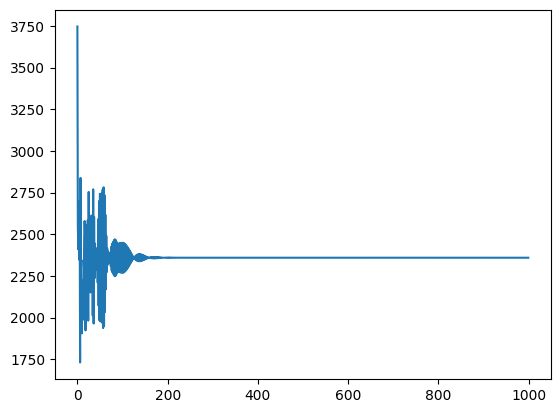

In [3]:
from torch import nn
nin = 100
nout = 75
nhid  = 50

W = torch.randn(nin,nout)
#Phi = nn.Parameter()
Phi = torch.randn((nhid,nhid), requires_grad=True)
#Phi = torch.tensor(torch.randn(nhid,nhid), requires_grad=True)
optimizer = torch.optim.SGD([Phi], lr=0.01, momentum=0.9)

Wa = random_projection((nin,nhid),normalize=True,bias=True,scale=5,gate=True)
Wb = random_projection((nhid,nout))


loss_acc = []
for i in range(1000):
    optimizer.zero_grad()
    # Wh =  Wa * Phi * Wb
    Wh = torch.matmul(Wa,torch.matmul(Phi,Wb))
    loss = torch.linalg.matrix_norm(W-Wh,'fro')
    loss.backward()
    optimizer.step()
    loss_acc.append(loss.item())

print(loss_acc)
plt.plot(loss_acc)

In [ ]:
# Load the weight tensors from the file
weights_path = './../../data/layer_weights.pth'
weight_data = torch.load(weights_path)
print(weight_data.keys())

dict_keys(['model.layers.28.self_attn.q_proj.weight', 'model.layers.28.self_attn.k_proj.weight', 'model.layers.28.self_attn.v_proj.weight', 'model.layers.28.self_attn.o_proj.weight', 'model.layers.28.mlp.gate_proj.weight', 'model.layers.28.mlp.up_proj.weight', 'model.layers.28.mlp.down_proj.weight', 'model.layers.28.input_layernorm.weight'])


/var/folders/vl/8_b839fx467b9mn0g_w2wb8r0000gn/T/ipykernel_84285/1562293781.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weight_data = torch.load(weights_path)


torch.Size([11008, 4096])


  0%|          | 1/200 [00:00<01:03,  3.16it/s]

1556893.375


 26%|██▌       | 51/200 [00:13<00:44,  3.33it/s]

48779984.0


 50%|█████     | 101/200 [00:27<00:27,  3.64it/s]

49773852.0


 76%|███████▌  | 151/200 [00:41<00:13,  3.51it/s]

49901036.0


100%|██████████| 200/200 [00:56<00:00,  3.55it/s]

[1556893.375, 98626000.0, 82600736.0, 52169832.0, 59919880.0, 58688700.0, 45419264.0, 57079112.0, 46181292.0, 53944060.0, 44594500.0, 53691960.0, 40233632.0, 54831176.0, 38490024.0, 59352816.0, 43020376.0, 64580364.0, 54502036.0, 58044288.0, 52559500.0, 54861800.0, 48202620.0, 54876052.0, 46295968.0, 57590416.0, 48810668.0, 57944048.0, 51463884.0, 54815636.0, 48473440.0, 56230004.0, 47861808.0, 58849884.0, 51671664.0, 55600508.0, 50069304.0, 54814752.0, 47734060.0, 57617252.0, 50245300.0, 56590060.0, 50704332.0, 54958248.0, 48458692.0, 57104544.0, 50138404.0, 56468452.0, 50578312.0, 55140788.0, 48779984.0, 56855124.0, 50161664.0, 56060936.0, 50087736.0, 55593024.0, 49240652.0, 56574600.0, 50194208.0, 55873632.0, 49874892.0, 55777188.0, 49479120.0, 56376272.0, 50245044.0, 55664104.0, 49599976.0, 56051588.0, 49788492.0, 56130956.0, 50077172.0, 55719160.0, 49645560.0, 56045032.0, 49872392.0, 55977648.0, 49938568.0, 55812624.0, 49766776.0, 55929356.0, 49808124.0, 55973644.0, 49979912.0, 55

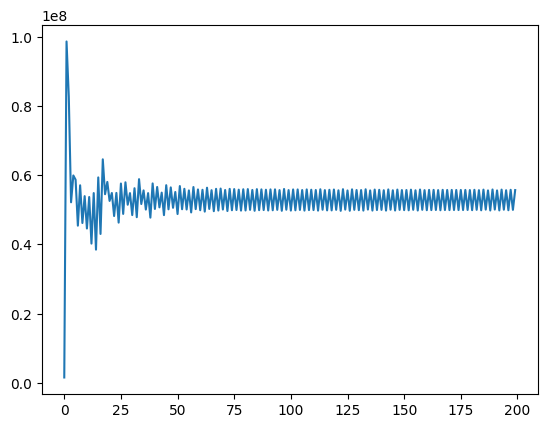

In [16]:
W = weight_data['model.layers.28.mlp.down_proj.weight']
W = W.T
print(W.shape)

nin = W.shape[0]
nout = W.shape[1]
nhid  = 256

#W = torch.randn(nin,nout)
#Phi = nn.Parameter()
Phi = torch.randn((nhid,nhid), requires_grad=True)
#Phi = torch.tensor(torch.randn(nhid,nhid), requires_grad=True)
optimizer = torch.optim.SGD([Phi], lr=0.01, momentum=0.9)

Wa = random_projection((nin,nhid),normalize=True,bias=True,scale=5,gate=True)
Wb = random_projection((nhid,nout))

from tqdm import tqdm

loss_acc = []
for i in tqdm(range(200)):
    optimizer.zero_grad()
    # Wh =  Wa * Phi * Wb
    Wh = torch.matmul(Wa,torch.matmul(Phi,Wb))
    loss = torch.linalg.matrix_norm(W-Wh,'fro')
    loss.backward()
    optimizer.step()
    loss_acc.append(loss.item())
    if i % 50 == 0:
        print(loss_acc[-1])

print(loss_acc)
plt.plot(loss_acc)




torch.Size([11008, 4096])


  0%|          | 1/1000 [00:00<04:11,  3.97it/s]

8.759662628173828


  5%|▌         | 51/1000 [00:15<04:43,  3.35it/s]

8.68564510345459


 10%|█         | 101/1000 [00:30<04:39,  3.22it/s]

8.595303535461426


 15%|█▌        | 151/1000 [00:45<04:39,  3.03it/s]

8.50466537475586


 20%|██        | 201/1000 [01:05<06:15,  2.13it/s]

8.414865493774414


 25%|██▌       | 251/1000 [01:39<09:08,  1.37it/s]

8.323251724243164


 30%|███       | 301/1000 [02:10<05:49,  2.00it/s]

8.23178768157959


 35%|███▌      | 351/1000 [02:36<05:42,  1.90it/s]

8.140237808227539


 40%|████      | 401/1000 [03:00<04:21,  2.29it/s]

8.048624038696289


 45%|████▌     | 451/1000 [03:21<03:49,  2.39it/s]

7.957021236419678


 50%|█████     | 501/1000 [03:46<04:02,  2.06it/s]

7.865655899047852


 55%|█████▌    | 551/1000 [04:09<03:19,  2.25it/s]

7.774181842803955


 60%|██████    | 601/1000 [04:32<03:21,  1.98it/s]

7.682971477508545


 65%|██████▌   | 651/1000 [04:58<02:48,  2.07it/s]

7.591841697692871


 70%|███████   | 701/1000 [05:22<02:30,  1.98it/s]

7.500618934631348


 75%|███████▌  | 751/1000 [05:46<02:02,  2.03it/s]

7.409639358520508


 80%|████████  | 801/1000 [06:13<01:33,  2.13it/s]

7.318730354309082


 85%|████████▌ | 851/1000 [06:34<01:03,  2.36it/s]

7.227828502655029


 90%|█████████ | 901/1000 [06:55<00:41,  2.39it/s]

7.137105464935303


 95%|█████████▌| 951/1000 [07:19<00:23,  2.12it/s]

7.046270370483398


100%|██████████| 1000/1000 [07:39<00:00,  2.17it/s]

[8.759662628173828, 8.759480476379395, 8.759129524230957, 8.75864028930664, 8.75800895690918, 8.757299423217773, 8.75654125213623, 8.75564956665039, 8.754636764526367, 8.753506660461426, 8.752314567565918, 8.751053810119629, 8.74973201751709, 8.748359680175781, 8.746962547302246, 8.745492935180664, 8.743996620178223, 8.742467880249023, 8.740893363952637, 8.739279747009277, 8.737685203552246, 8.736061096191406, 8.734394073486328, 8.732810974121094, 8.731152534484863, 8.729452133178711, 8.727738380432129, 8.726017951965332, 8.724327087402344, 8.722818374633789, 8.721267700195312, 8.719525337219238, 8.717734336853027, 8.715993881225586, 8.714252471923828, 8.712468147277832, 8.710687637329102, 8.708904266357422, 8.707115173339844, 8.705371856689453, 8.703622817993164, 8.701835632324219, 8.700011253356934, 8.69826602935791, 8.69650936126709, 8.694727897644043, 8.692919731140137, 8.691105842590332, 8.68929386138916, 8.687469482421875, 8.68564510345459, 8.683921813964844, 8.682185173034668, 8

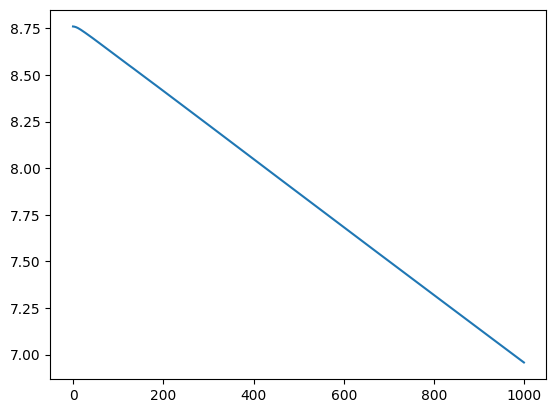

In [21]:
W = weight_data['model.layers.28.mlp.down_proj.weight']
W = W.T
print(W.shape)

nin = W.shape[0]
nout = W.shape[1]
nhid  = nhid 

#W = torch.randn(nin,nout)
#Phi = nn.Parameter()
Phi = torch.randn((nhid,nout), requires_grad=True)
#Phi = torch.tensor(torch.randn(nhid,nhid), requires_grad=True)
optimizer = torch.optim.SGD([Phi], lr=0.01, momentum=0.9)

Wa = random_projection((nin,nhid),normalize=True,bias=True,scale=5,gate=True)
Wb = torch.eye(nout)

from tqdm import tqdm

loss_acc = []
for i in tqdm(range(1000)):
    optimizer.zero_grad()
    # Wh =  Wa * Phi * Wb
    Wh = torch.matmul(Wa,torch.matmul(Phi,Wb))
    loss = (torch.linalg.matrix_norm(W-Wh,'fro'))/W.shape[0]
    loss.backward()
    optimizer.step()
    loss_acc.append(loss.item())
    if i % 50 == 0:
        print(loss_acc[-1])

print(loss_acc)
plt.plot(loss_acc)


torch.Size([4096, 11008])


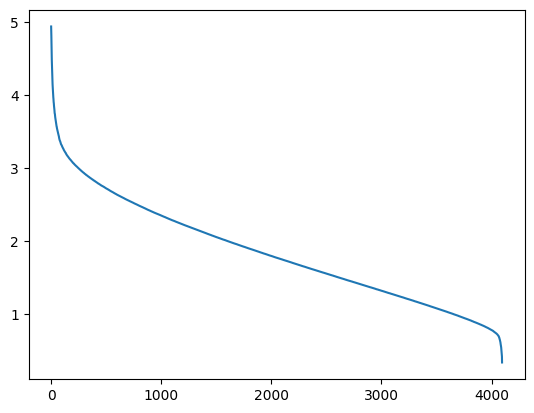

In [23]:
# Let us look at the SVD of the W. Take
import scipy.linalg as la
import matplotlib.pyplot as plt


A =  weight_data['model.layers.28.mlp.down_proj.weight']
print(A.shape)

singular_values = la.svdvals(A)  # Singular values for non-square matrices
plt.plot(singular_values)


In [33]:
from scipy.sparse.linalg import svds
As = np.matrix(A.detach().numpy(), dtype="float32")

U, S, Vt = svds(As, k=100)

(4096, 100)
(100, 11008)
torch.Size([11008, 4096])


  1%|          | 1/100 [00:00<00:22,  4.31it/s]

13497.5439453125


 51%|█████     | 51/100 [00:11<00:10,  4.59it/s]

11307.923828125


100%|██████████| 100/100 [00:22<00:00,  4.36it/s]

[13497.5439453125, 8588.74609375, 6802.38818359375, 16326.9677734375, 15001.4638671875, 8313.6826171875, 7633.23828125, 14626.0693359375, 12580.7509765625, 11286.1416015625, 10855.7041015625, 11478.7294921875, 9656.93359375, 13853.4306640625, 12988.0458984375, 9831.9755859375, 8551.40625, 14387.4462890625, 12982.138671875, 10317.306640625, 9423.470703125, 13239.6865234375, 11641.8662109375, 11783.197265625, 10922.9287109375, 11801.1484375, 10310.1435546875, 12948.2412109375, 11897.03125, 11043.5888671875, 9779.80859375, 13245.87109375, 11976.55078125, 11163.03515625, 10071.0888671875, 12818.1015625, 11443.353515625, 11769.080078125, 10715.6162109375, 12171.7939453125, 10814.10546875, 12353.203125, 11243.3642578125, 11722.2392578125, 10447.232421875, 12628.4072265625, 11429.59765625, 11623.2841796875, 10429.2578125, 12572.0048828125, 11307.923828125, 11798.0341796875, 10646.55078125, 12327.609375, 11044.841796875, 12065.7666015625, 10911.5673828125, 12078.3349609375, 10815.5263671875, 1

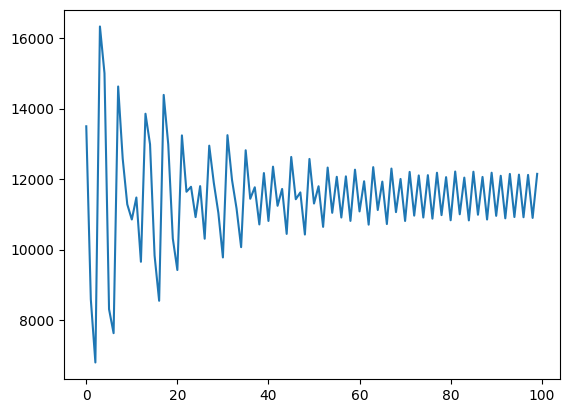

In [40]:
print(U.shape)
print(Vt.shape)


W = weight_data['model.layers.28.mlp.down_proj.weight']
W = W.T
print(W.shape)

nin = W.shape[0]
nout = W.shape[1]
nk = 100
nhid  = nhid 

Phi = torch.randn((nhid,nk), requires_grad=True)
optimizer = torch.optim.SGD([Phi], lr=0.01, momentum=0.9)

Wa = random_projection((nin,nhid),normalize=True,bias=True,scale=5,gate=True)
Wb = torch.from_numpy(U).T

from tqdm import tqdm

loss_acc = []
for i in tqdm(range(100)):
    optimizer.zero_grad()
    # Wh =  Wa * Phi * Wb
    Wh = torch.matmul(Wa,torch.matmul(Phi,Wb))
    loss = (torch.linalg.matrix_norm(W-Wh,'fro'))
    loss.backward()
    optimizer.step()
    loss_acc.append(loss.item())
    if i % 50 == 0:
        print(loss_acc[-1])

print(loss_acc)
plt.plot(loss_acc)

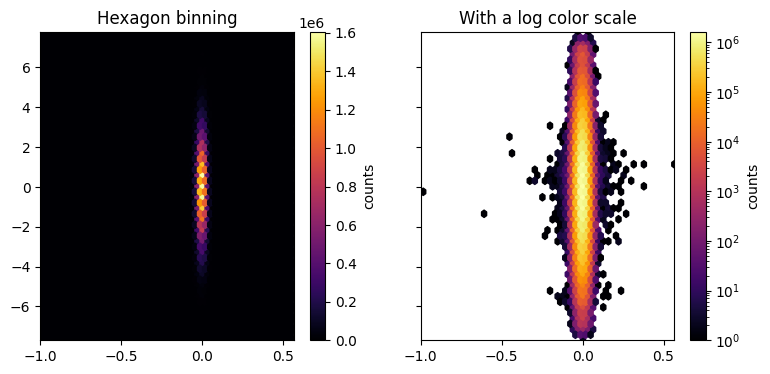

In [41]:
#w_vec = W.flatten().detach().numpy()
#wh_vec = Wh.flatten().detach().numpy()

xlim = w_vec.min(), w_vec.max()
ylim = wh_vec.min(), wh_vec.max()

fig, (ax0, ax1) = plt.subplots(ncols=2, sharey=True, figsize=(9, 4))

hb = ax0.hexbin(w_vec, wh_vec, gridsize=50, cmap='inferno')
ax0.set(xlim=xlim, ylim=ylim)
ax0.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax0, label='counts')

hb = ax1.hexbin(w_vec, wh_vec, gridsize=50, bins='log', cmap='inferno')
ax1.set(xlim=xlim, ylim=ylim)
ax1.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax1, label='counts')